In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt

import jd

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,TargetEncoder
from category_encoders import CountEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

from sklearn.impute import KNNImputer

from feature_engine.encoding import OrdinalEncoder as feat_eng_OrdinalCategoricalEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
def preprocess(X,drop=False,X_test = None):
    """
    pasa X_test sólo al preprocesar X
    """
    if X_test is not None:
        cols_mas_unique_en_train = ["subvillage","installer","funder","scheme_name","wpt_name",
                                    "region_code","ward","extraction_type"]
        for i in cols_mas_unique_en_train:
            unicos_en_test = X_test[i].unique().tolist()
            X[i] = [x if x in unicos_en_test else np.nan for x in X[i].values]
            #X[i] = [x if x in unicos_en_test else x.split(" ")[0] for x in X[i].values]



    #Fechas------------------------------------------------------------------------ 
    X.date_recorded = X.date_recorded.astype("O")
    X.date_recorded = pd.to_datetime(X.date_recorded)
    X['date_recorded'] = (X.date_recorded.max() - X.date_recorded).dt.days

    #population_binned optbinning------------------------------------------------------------------------ 
    X["population_binned"] = X["population"].copy()
    X["population_binned"] = X["population_binned"].astype("category")
    #Marcar VALORES sin sentido como nan para ser imputados------------------------------------------------------------------------  
    X["construction_year"] = X.construction_year.max()-X.construction_year
    X.loc[X["construction_year"] ==2013,"construction_year"] = X.construction_year.mean() # si da 2013 la resta fue max - cero
    #X.construction_year = X.construction_year.fillna(X.construction_year.mean()) 
    #Drop list ------------------------------------------------------------------------ 

    drop_list  = ["management_group","num_private","recorded_by","region","region_code",
              "extraction_type_group","extraction_type_class","payment","quality_group",
              "quantity_group","source_class","source_type","waterpoint_type_group",
              "permit","population"]  
    X.drop(drop_list,axis=1,inplace=True)
    #Clusters de latitud y longitud, se hace fuera para que X_test sea transform sin fit------------------------------------------------------------------------
    #clustering = KMeans(n_clusters=20)
    #X["location_cluster"] = clustering.fit_predict(X[["latitude","longitude"]].to_numpy())
    
    return X

In [3]:
X = pd.read_csv("In/Training_set_values.csv")
y = pd.read_csv("In/Training_set_labels.csv")
X_test = pd.read_csv("In/Test_set_values.csv")

X_test = preprocess(X_test)
X = preprocess(X,X_test)

X = X.fillna("Missing")
#



In [4]:
df = pd.merge(X,y,on="id")

In [5]:
for col in X.columns:
    if (X[col].nunique() < 25) and (X[col].nunique() > 3):
        print(col)

basin
district_code
scheme_management
extraction_type
management
payment_type
water_quality
quantity
source
waterpoint_type


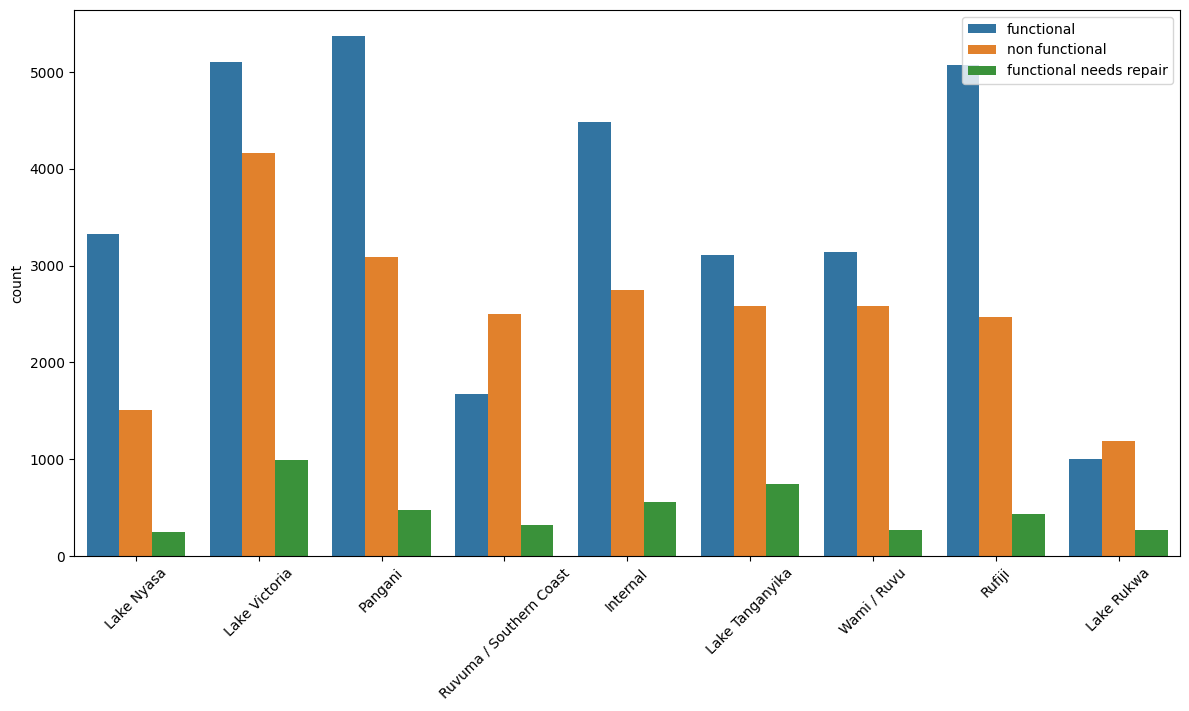

In [6]:
plt.rcParams['figure.figsize'] = [12, 6] 
ax = sns.countplot(data=df, x='basin', hue='status_group')#,stat="percent"

ax.set_xlabel('')  # optionally remove 'date' label, as it is clear from the ticklabels
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(loc= "upper right")
plt.show()

In [7]:
for col in X.select_dtypes(include=np.number).columns:
        print(col)

id
amount_tsh
date_recorded
gps_height
longitude
latitude
district_code
construction_year


Text(0.5, 1.0, 'Distribución tal cual')

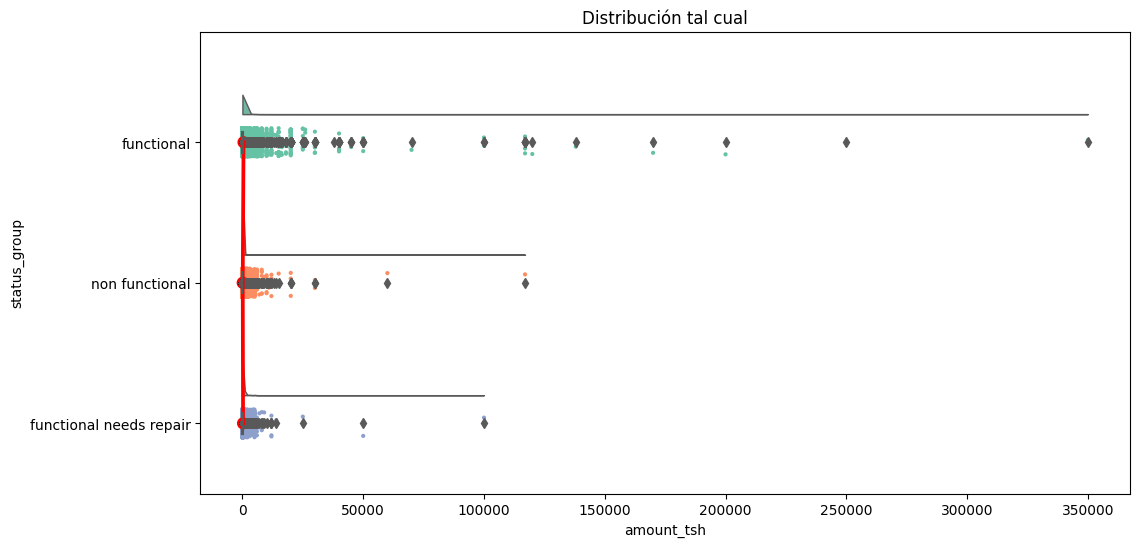

In [9]:
X.construction_year
pt.RainCloud(x = "status_group", y = "amount_tsh", data = df,width_viol = 1,orient = "h",pointplot=True)
plt.title("Distribución tal cual")

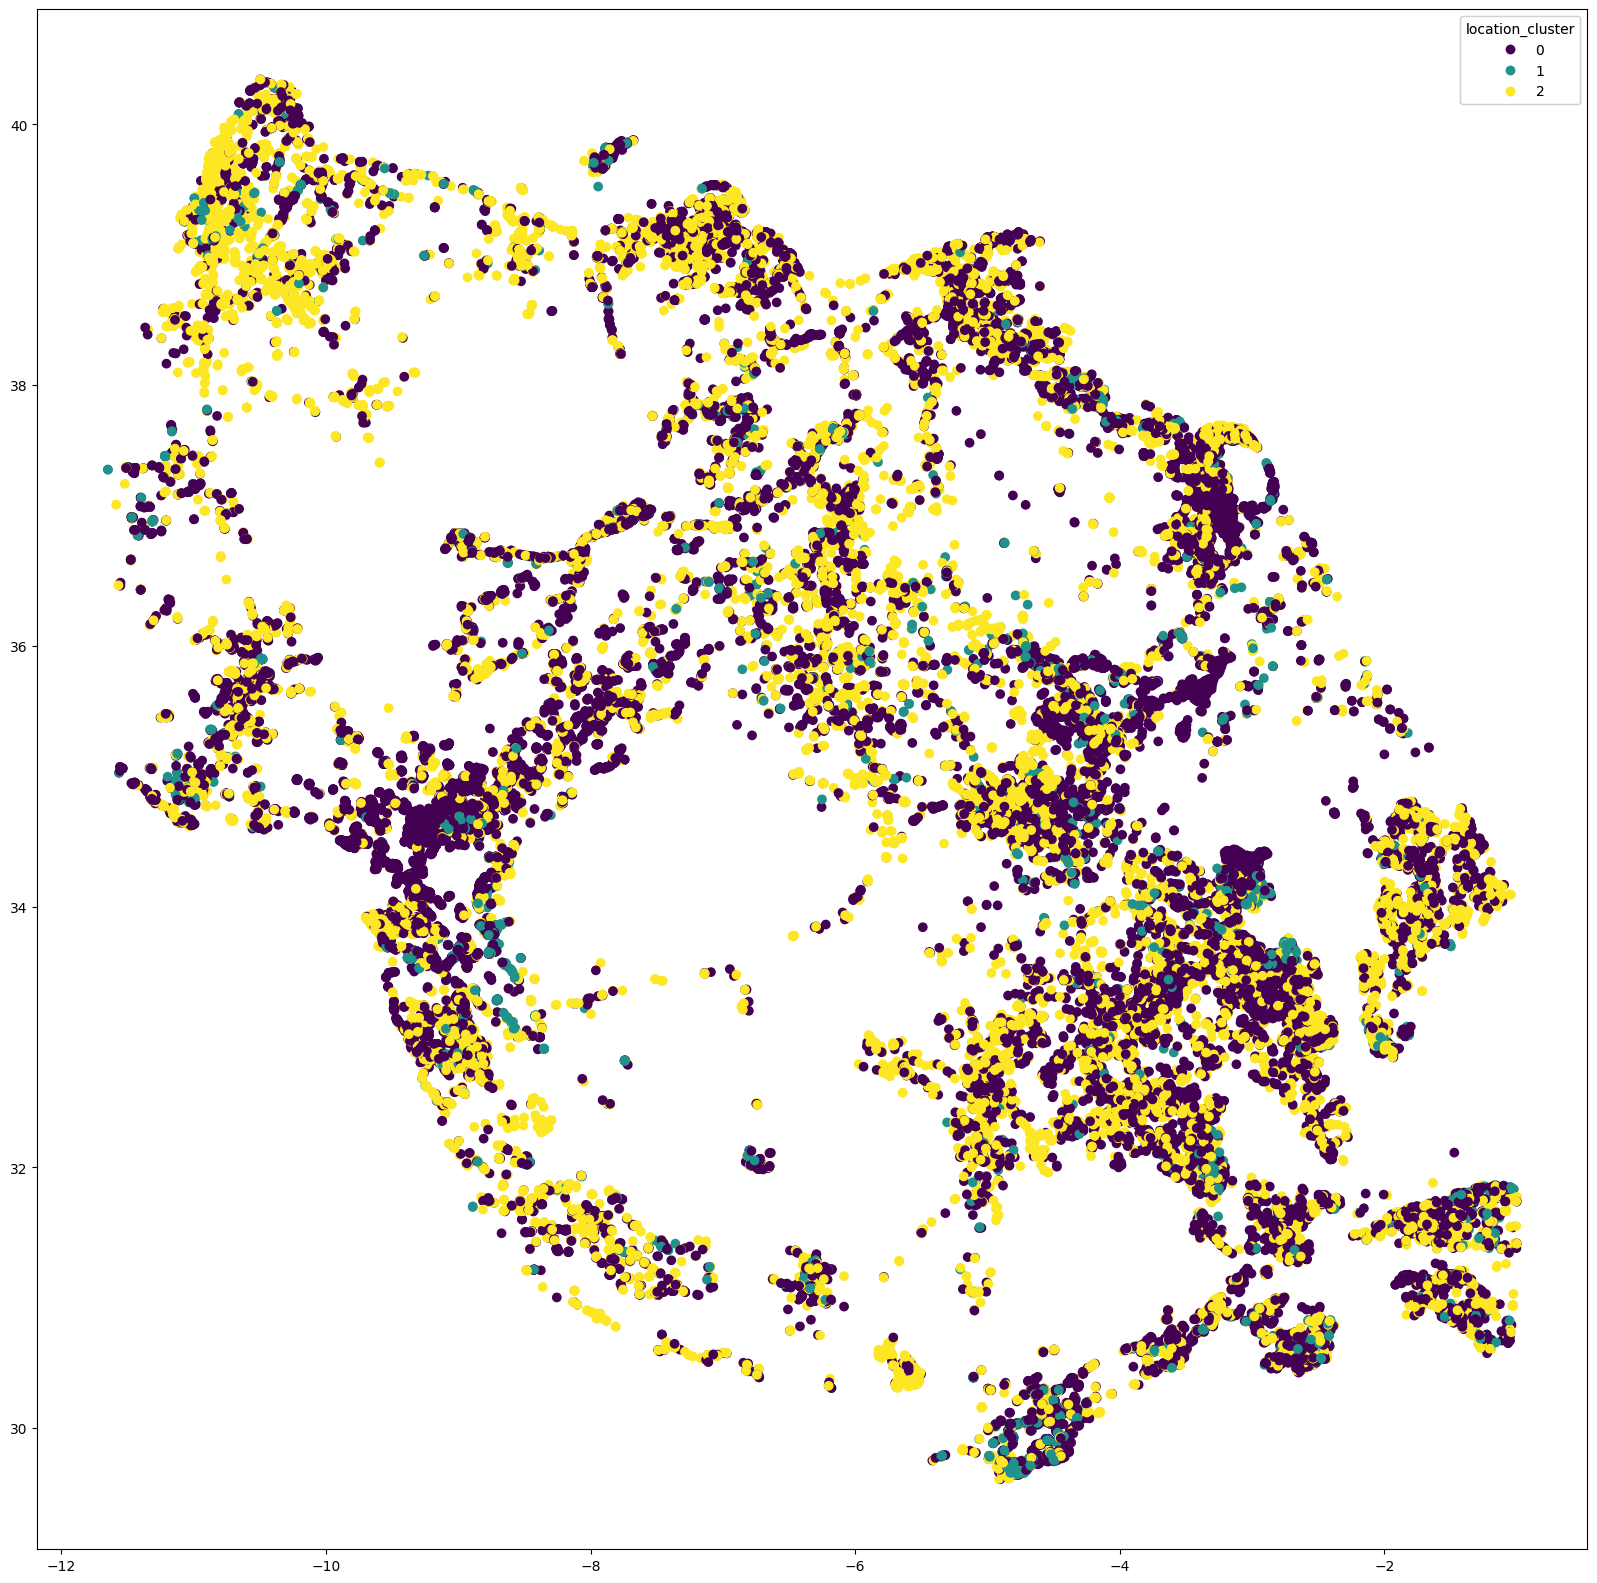

In [18]:
df_geo = df[["latitude","longitude","status_group"]].copy()
df_geo = df_geo.loc[(df_geo["latitude"]!=0)&(df_geo["longitude"]!=0)]

fig,ax = plt.subplots(figsize=(20,20))
df_geo["status_group_num"]=LabelEncoder().fit_transform(df_geo.status_group)


scatter = ax.scatter(data=df_geo,x="latitude",y="longitude",c="status_group_num")

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="location_cluster")
ax.add_artist(legend1)
plt.show()
